# Python Data Analysis: Home Exam (2020-2021)

> + **Allocated time:** 10 days
> + **Send your final notebook** at [romain.madar@cern.ch](mailto:romain.madar@cern.ch) before **28/09/2020 23:59:59 CEST** 
>
> **Comment 1**: the final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about Parkinson disease or general medecine to answer the questions asked in this exam.*
>
> **Comment 2**: discussions are encouraged,  with the professor (*via* email or just passing by my office) and between students. However you should make sure to demonstrate that *you understand what is in your notebook*.
> 
> This exam is split int 3 parts: (1) basic data exploration, (2) discriminative power analysis, (3) linear correlation modeling.

## A bit of context ...


The dataset considered in work contains information about Parkinson disease and voice properties of subjects. The goal of this exam is to perform few analysis steps, from exploration to modelling, on an completely unknown dataset. This also demonstrates the generality of the concepts learned during the lecture. The ultimate goal of such dataset - not studied in this exam - would to be able to predict if a subject is healthy, from its voice property: this is a classification problem. All details about this dataset can be found on this [webpage](https://archive.ics.uci.edu/ml/datasets/parkinsons), and the complete scientific citation is:
> *Little, M.A., McSharry, P.E., Roberts, S.J. et al.* **Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection**. BioMed Eng OnLine 6, 23 (2007). https://doi.org/10.1186/1475-925X-6-23

An overview of the dataset features is given below:
+ **name** - ASCII subject name and recording number     
+ **MDVP:Fo(Hz)** - Average vocal fundamental frequency    
+ **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
+ **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
+ **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency
+ **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA** - Several measures of variation in amplitude
+ **NHR, HNR** - Two measures of ratio of noise to tonal components in the voice
+ **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
+ **RPDE, D2** - Two nonlinear dynamical complexity measures
+ **DFA** - Signal fractal scaling exponent
+ **spread1, spread2, PPE** - Three nonlinear measures of fundamental frequency variation

## 1 Import packages and data

### 1.1 import the usual packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Disable some warning due to the tool evolution
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Plot settings
import matplotlib as mpl
mpl.rcParams['legend.frameon'  ] = False
mpl.rcParams['legend.fontsize' ] = 'xx-large'
mpl.rcParams['xtick.labelsize' ] = 16
mpl.rcParams['ytick.labelsize' ] = 16
mpl.rcParams['axes.titlesize'  ] = 18
mpl.rcParams['axes.labelsize'  ] = 18
mpl.rcParams['lines.linewidth' ] = 2.5
mpl.rcParams['lines.markersize'] = 10

### 1.2 Import the data

The data file can be found in `lecture-python/data` directory and is called `parkinson.data`. This file in the csv format. Create a pandas dataframe `df` from the csv file, and print the first 5 rows of the data.

In [5]:
df = pd.read_csv('../../data/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2 Basic data exploration (7pts)

### 2.1 Fraction of healty subjects (1pts)

Determine the percentage of healty subjects in the dataset.

In [6]:
Ntot = len(df)
Nhea = len(df[df['status']==0])
print('fraction of healty subjects: {:.0f}%'.format(Nhea/Ntot*100))
print(Ntot, Nhea)

fraction of healty subjects: 25%
195 48


### 2.2 Typical range of every features (2pts)

When manipulating data, it is important to know if the numbers are large, small, with a large variation, etc ...
This allows, for example, to produced plot with adapted scales and then have a good data visualisation. 

Compute and print the minimum, the maximum and the mean and the RMS values of every features, but `name` (not a number) and `status` (what we want to predict, called the *target*). Universal numpy functions `ufunc` should be used.

> **HINT:** one can get a python list of column names from a dataframe using the command `list(df.columns)` (the object `df.columns` is what we call a *pandas serie*, which is not exactly a python list).

In [5]:
# Get the list of variable and remove the first one, 
# which is a name, and status
varNames = list(df.columns)
varNames.remove('name')
varNames.remove('status')

# Loop over variables
for var in varNames:
    
    # Get the numpy array (optionnal, but usually faster)
    v = df[var].values
    
    # Define print formatting
    fmt = '{}:\n -> mini - max = {} - {}\n -> mean - rms = {:f} - {:f}'
    
    # Compute values
    statValues =  np.min(v), np.max(v), np.mean(v), np.std(v)
    
    # Print them
    print(fmt.format(var, *statValues))

MDVP:Fo(Hz):
 -> mini - max = 88.333 - 260.105
 -> mean - rms = 154.228641 - 41.283800
MDVP:Fhi(Hz):
 -> mini - max = 102.145 - 592.03
 -> mean - rms = 197.104918 - 91.256652
MDVP:Flo(Hz):
 -> mini - max = 65.476 - 239.17
 -> mean - rms = 116.324631 - 43.409676
MDVP:Jitter(%):
 -> mini - max = 0.00168 - 0.03316
 -> mean - rms = 0.006220 - 0.004836
MDVP:Jitter(Abs):
 -> mini - max = 7.000000000000001e-06 - 0.00026000000000000003
 -> mean - rms = 0.000044 - 0.000035
MDVP:RAP:
 -> mini - max = 0.0006799999999999999 - 0.02144
 -> mean - rms = 0.003306 - 0.002960
MDVP:PPQ:
 -> mini - max = 0.0009199999999999999 - 0.01958
 -> mean - rms = 0.003446 - 0.002752
Jitter:DDP:
 -> mini - max = 0.0020399999999999997 - 0.06433
 -> mean - rms = 0.009920 - 0.008880
MDVP:Shimmer:
 -> mini - max = 0.00954 - 0.11907999999999999
 -> mean - rms = 0.029709 - 0.018809
MDVP:Shimmer(dB):
 -> mini - max = 0.085 - 1.302
 -> mean - rms = 0.282251 - 0.194377
Shimmer:APQ3:
 -> mini - max = 0.00455 - 0.05647000000000

Store these numbers into a "double dictionnary" to later access them *via* `statValue[varName][value]` (where `varName` is the name of the feature and `value` can be `min`, `max`, `mean` or `rms`.

In [6]:
# Initialize dictionnary
statValuesPerVar = {}

# Loop over variables
for var in varNames:
    v = df[var].values
    statValuesPerVar[var] = {
        'min' : np.min(v), 
        'max' : np.max(v), 
        'mean': np.mean(v), 
        'rms' : np.std(v)
    }

### 2.3 Data visualisation: feature distributions (4pts)

Before producing actual histograms, it is important to define the proper *histogram binning*. The binning is a collection of windows, or bins, in which observations are counted. When these windows are too wide, we loose the information on the shape of the distribution (*e.g.* only one bin leads to a simple counting). When these windows are too narrow, counts are low and statistical fluctuations degrade the visualisation. 


a) Write a function which takes the feature name in argument and returns a binning, *i.e.* a 1-dim numpy array, statisfying:
 1. lower edge of the first bin: minimum value of the feature
 2. heigher edge of the last bin: maximum value of the feature
 3. the RMS corresponds to 2.5 bins

> **HINT:** the "double dictionnary" defined before might be useful here...

In [7]:
def Bins(var):
    '''Determine the binning of a given variable name "var", based on min, max and rms.
     + var [string]: variable name
     + return a 1D numpy array
    '''
    vMin = statValuesPerVar[v]['min']
    vMax = statValuesPerVar[v]['max']
    vRMS = statValuesPerVar[v]['rms']
    nBin = np.abs(vMax-vMin) * 2.5 / vRMS
    return np.linspace(vMin, vMax, nBin)

b) Plot the histogram of each feature, but `name` and `status`, using the binning defined above.

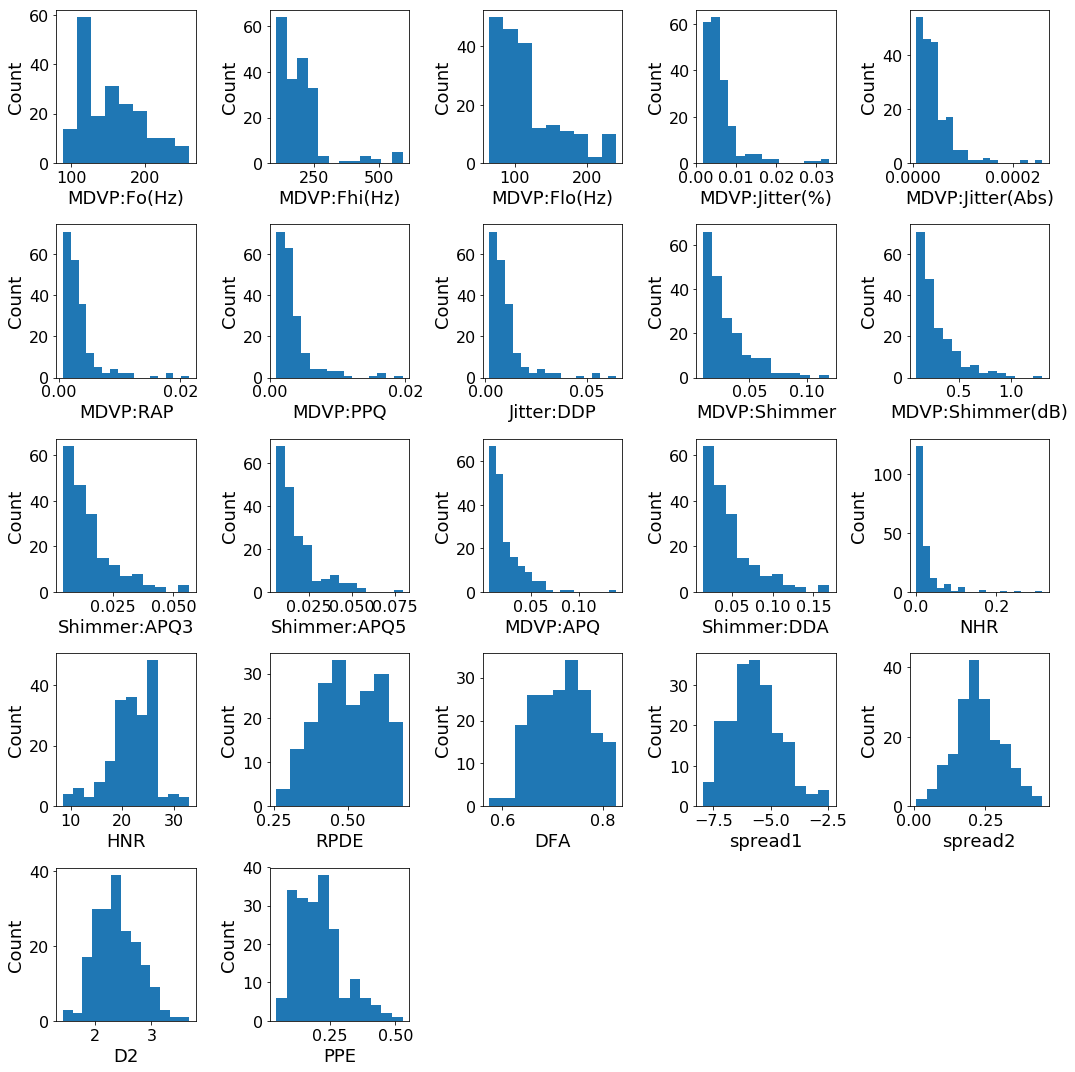

In [8]:
# Put all distribution in one figure
plt.figure(figsize=(15, 15))
Nplots = np.int(np.sqrt(len(varNames)))+1

# Loop over features
for i, v in enumerate(varNames):
    
    # Enter in the proper subplot
    plt.subplot(Nplots, Nplots, i+1)
    
    # Plot this histogram and add axis label
    plt.hist(df[v], bins=Bins(v))
    plt.xlabel(v)
    plt.ylabel('Count')
    
# Final plot cosmetics
plt.tight_layout()

## 3. Discriminative power (8pts)

Now, we want to understand which feature show the largest difference between healthy and Parkinson subjects. This first step, to get an intuition, is to compare distributions for both healty and Parkinson categories. 

Produce the histogram of every feature both for for healty and parkinson categories. In order to properly compare distribution shape (and not absolute number of observation in each category), one can use the `density=True` option in `plot.hist()` function.


### 3.1 Distribution comparison (2pts)

a) Modify the plotting code from the previous question to overlay distribution for healty and for Parkinson data. In order to properly compare distribution shape (and not absolute number of observation in each category), one can use the `density=True` option of the `plot.hist()` function.

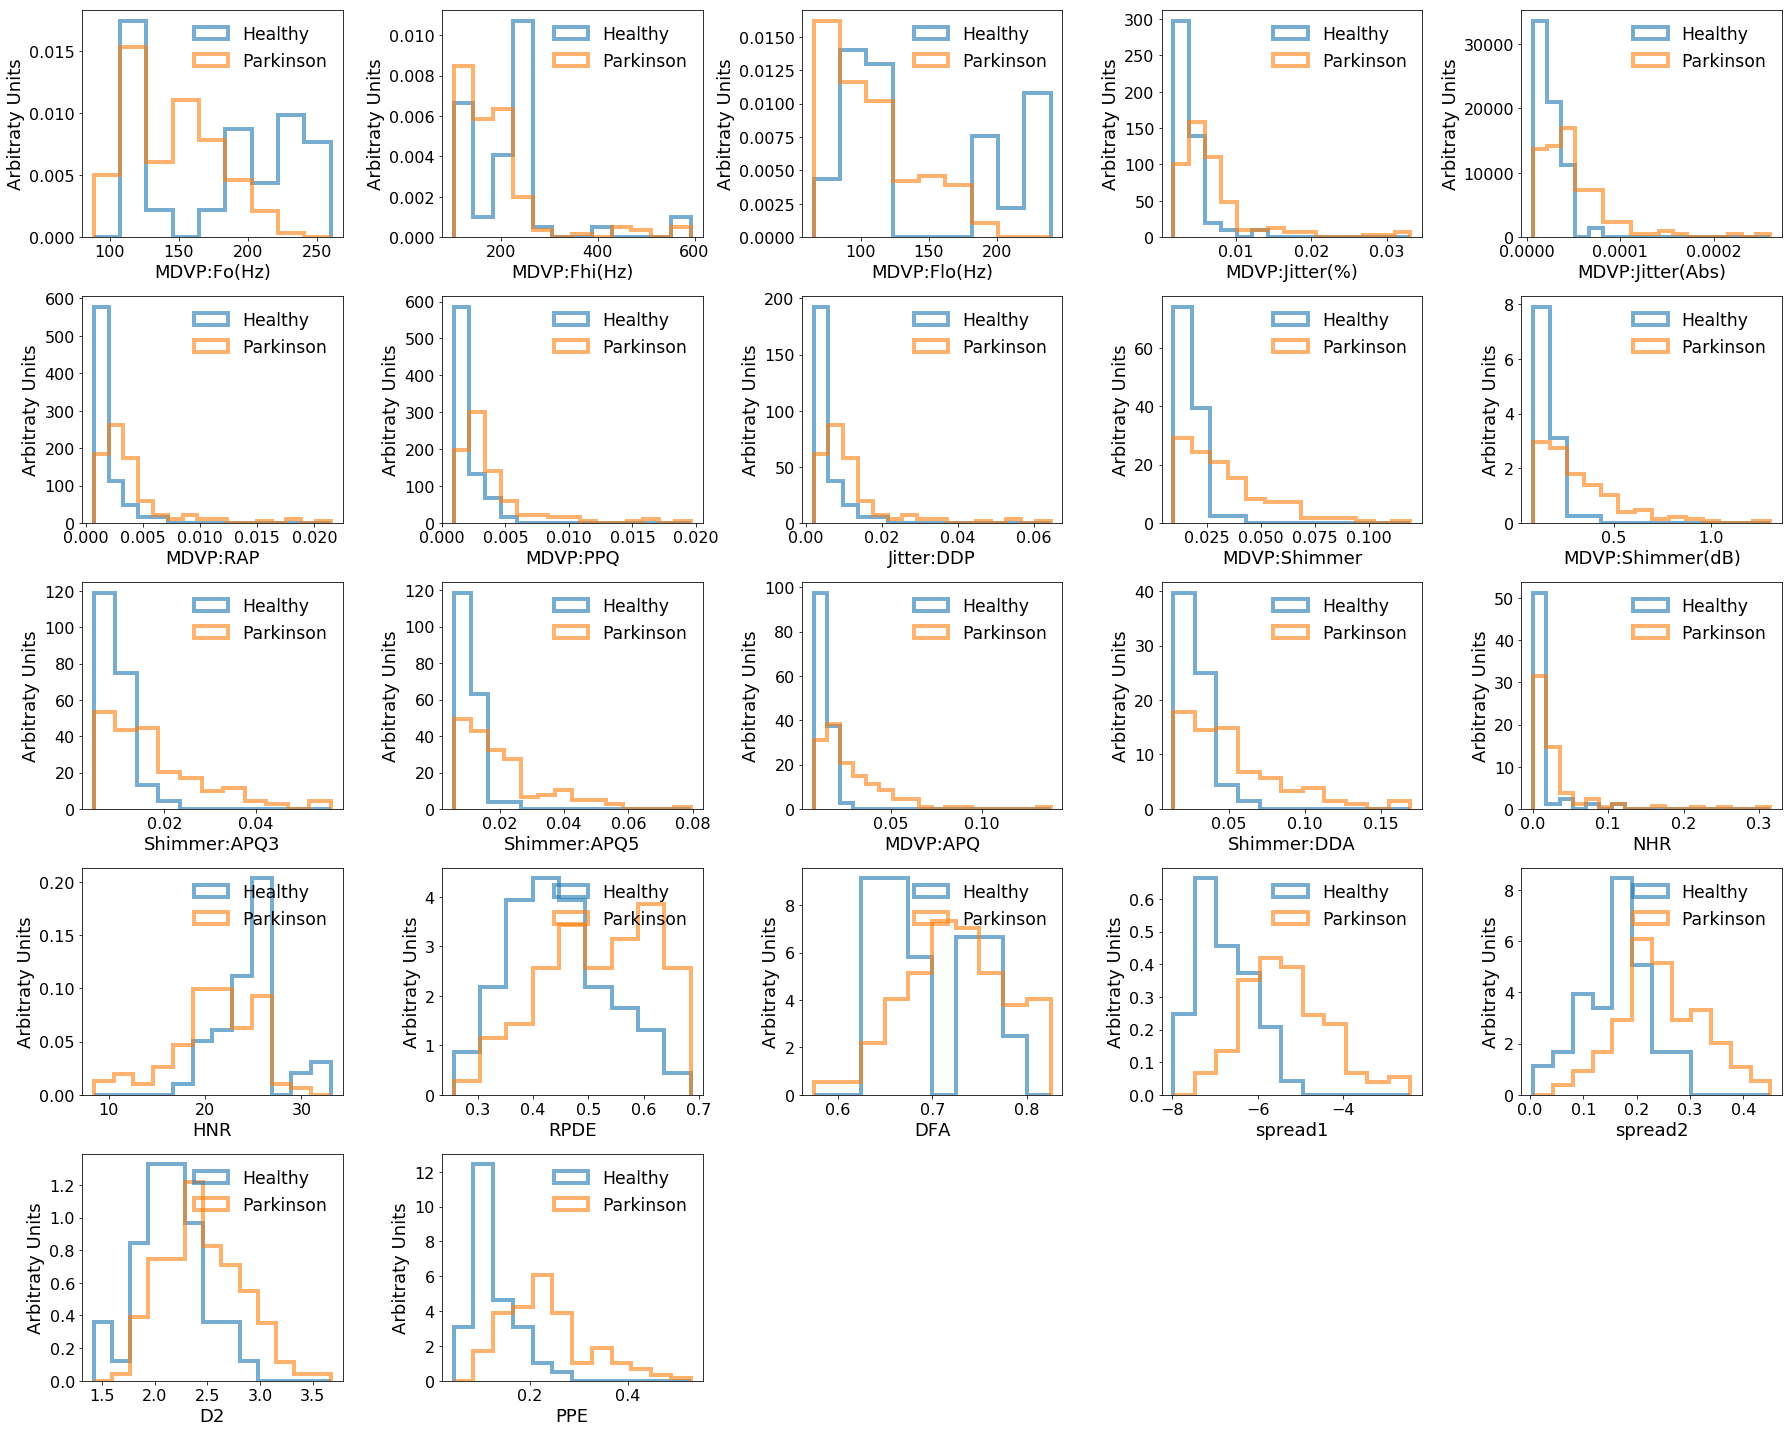

In [9]:
# Put all distribution in one figure
plt.figure(figsize=(25, 20))
Nplots = int(np.sqrt(len(varNames)) + 1)

# For plot legend
status = {0: 'Healthy', 1: 'Parkinson'}

# Loop over features
for i, v in enumerate(varNames):
    
    # Enter in the proper subplot
    plt.subplot(Nplots, Nplots, i+1)
    
    # histo style
    style = {'histtype': 'step', 'density': True, 'linewidth': 4, 'alpha': 0.6}
    
    # Plot this histogram and add axis label
    for cat, dfCat in df.groupby('status'):
        plt.hist(dfCat[v], bins=Bins(v), label=status[cat], **style)
    plt.xlabel(v)
    plt.ylabel('Arbitraty Units')
    plt.legend()
    
# Final plot cosmetics
plt.tight_layout()

b) From the resulting plot, which variables seem to be the most powerful in discriminating healthy subject from Parkinson ones?

### 2.2 Quantitative estimation (4pts)

a) It is also possible to define quantitative estimators for the separation between two distributions. One possibility is to consider:
$$
s \; = \; \frac{1}{2} \; \sum_{i} \frac{\left(H_i - P_i\right)^2}{H_i + P_i}
$$
where the sum runs one histogram bins. $H_i$ and $P_i$ are the *normalized* contents of the bin $i$ for healthy (H like Healthy) and parkinson (P like Parkinson) categories of the studied variable. A *Normalized* bin content means that the sum over all bins content of the histogram is equal to unity:
$$
\sum_{i} H_i = 1.0 ~~\text{and}~~ \sum_{i} P_i = 1.0
$$

a) 1. Write a function which takes a 1-dim array of data and a binning as arguments, and return an numpy array of normalized bin contents. 

> **HINT:** The content of each bin of an histogram can be obtained from a numpy array `a` for a binning `bins` using `np.histogram(a, bins)`:
> ```python
> binContents, binEdges = np.histogram(a, bins)
> ```

In [10]:
def normalizedBins(data, bins):
    d, _ = np.histogram(data, bins)
    return d / np.sum(d)

a) 2. Loop over features and compute (and print), for each of them, the separation $s$ as defined above. One has to pay attention to `nan` (Not a Number) values, since there are divisions. Indeed, if both $H_i$ and $P_i$ are null, $s$ invovles a division by $0$. For this aspect, the `np.isfinite()` numpy function can be quite useful.

Which one has the largest separation? What its the separation value?

In [11]:
# Define healthy and Parkinson data
isH = df['status']==0
dfH, dfP = df[isH], df[~isH]

# Container to store the values
sep = np.zeros(len(varNames))

# Loop over features
for i, v in enumerate(varNames):
    
    # Get bin contents
    H = normalizedBins(dfH[v], Bins(v))
    P = normalizedBins(dfP[v], Bins(v))
    
    # Compute local separation and keep only finit numbers
    sLocal = 0.5 * (H-P)**2 / (H+P)
    sLocal = sLocal[np.isfinite(sLocal)]
    
    # Sum over bins and store the result
    s = np.sum(sLocal)
    sep[i] = s
    
    # Print
    toPrint  = '{}:'.format(v).ljust(18)
    toPrint += '{:.0f}%'.format(s*100)
    print(toPrint)

MDVP:Fo(Hz):      38%
MDVP:Fhi(Hz):     24%
MDVP:Flo(Hz):     37%
MDVP:Jitter(%):   25%
MDVP:Jitter(Abs): 22%
MDVP:RAP:         28%
MDVP:PPQ:         26%
Jitter:DDP:       28%
MDVP:Shimmer:     32%
MDVP:Shimmer(dB): 30%
Shimmer:APQ3:     26%
Shimmer:APQ5:     29%
MDVP:APQ:         35%
Shimmer:DDA:      26%
NHR:              18%
HNR:              23%
RPDE:             13%
DFA:              24%
spread1:          47%
spread2:          30%
D2:               18%
PPE:              46%


/home/rmadar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


b) Display this information using a bar plot, ranked from the most to the less discriminant variable.

> **HINT:** functions `np.sort()` and `np.argsort()` might be useful here.

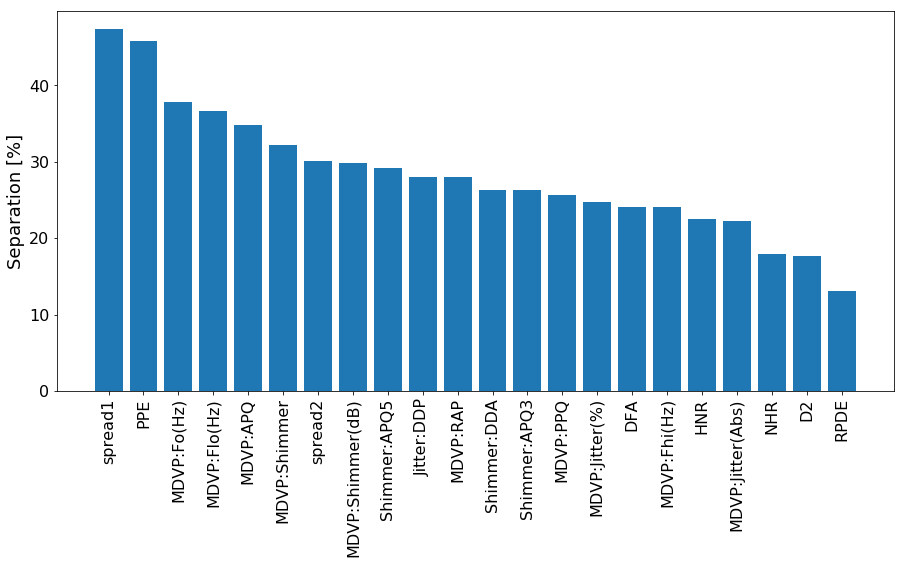

In [12]:
# Sort the separations
sepSorted = np.sort(sep)
sepSorted = sepSorted[::-1]

# Sort the variables
iSorted = np.argsort(sep)
iSorted = iSorted[::-1]
varSorted = np.array(varNames)[iSorted]

# Plot the result
plt.figure(figsize=(15, 7))
plt.bar(varSorted, height=sepSorted*100)
plt.ylabel('Separation [%]')
plt.xticks(rotation=90);

### 2.3 Single features are not the whole story (2pts)

a) Investigate the correlations between `spread1` and `PPE`. What do you conlcude from this? Check the correlation between `spread1` and the four first higher ranked variables.

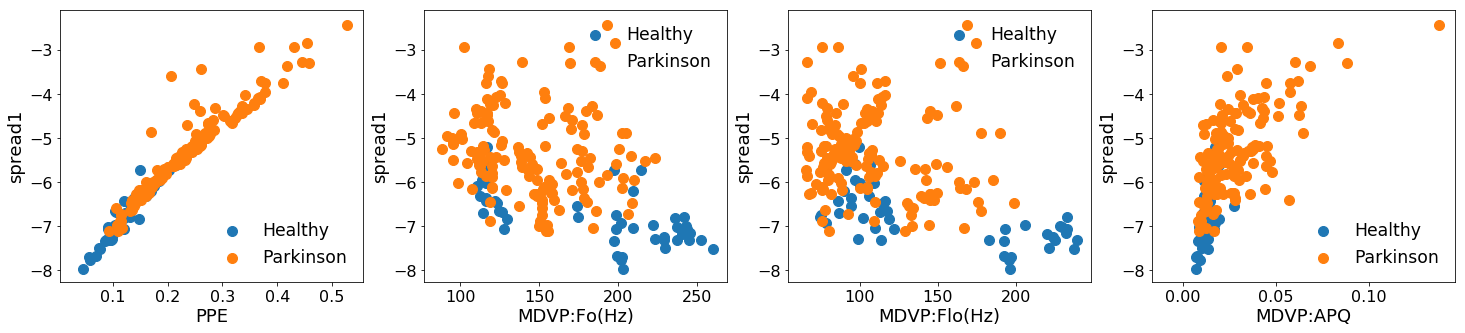

In [13]:
plt.figure(figsize=(25, 5))
for i, v in enumerate(varSorted[1:5]):
    plt.subplot(1, 4, i+1)
    plt.scatter(dfH[v], dfH['spread1'], label='Healthy')
    plt.scatter(dfP[v], dfP['spread1'], label='Parkinson')
    plt.xlabel(v)
    plt.ylabel('spread1')
    plt.legend()

b) Using one pandas plotting function seen in the lecture, check the correlations between the 5 features with the highest separation.

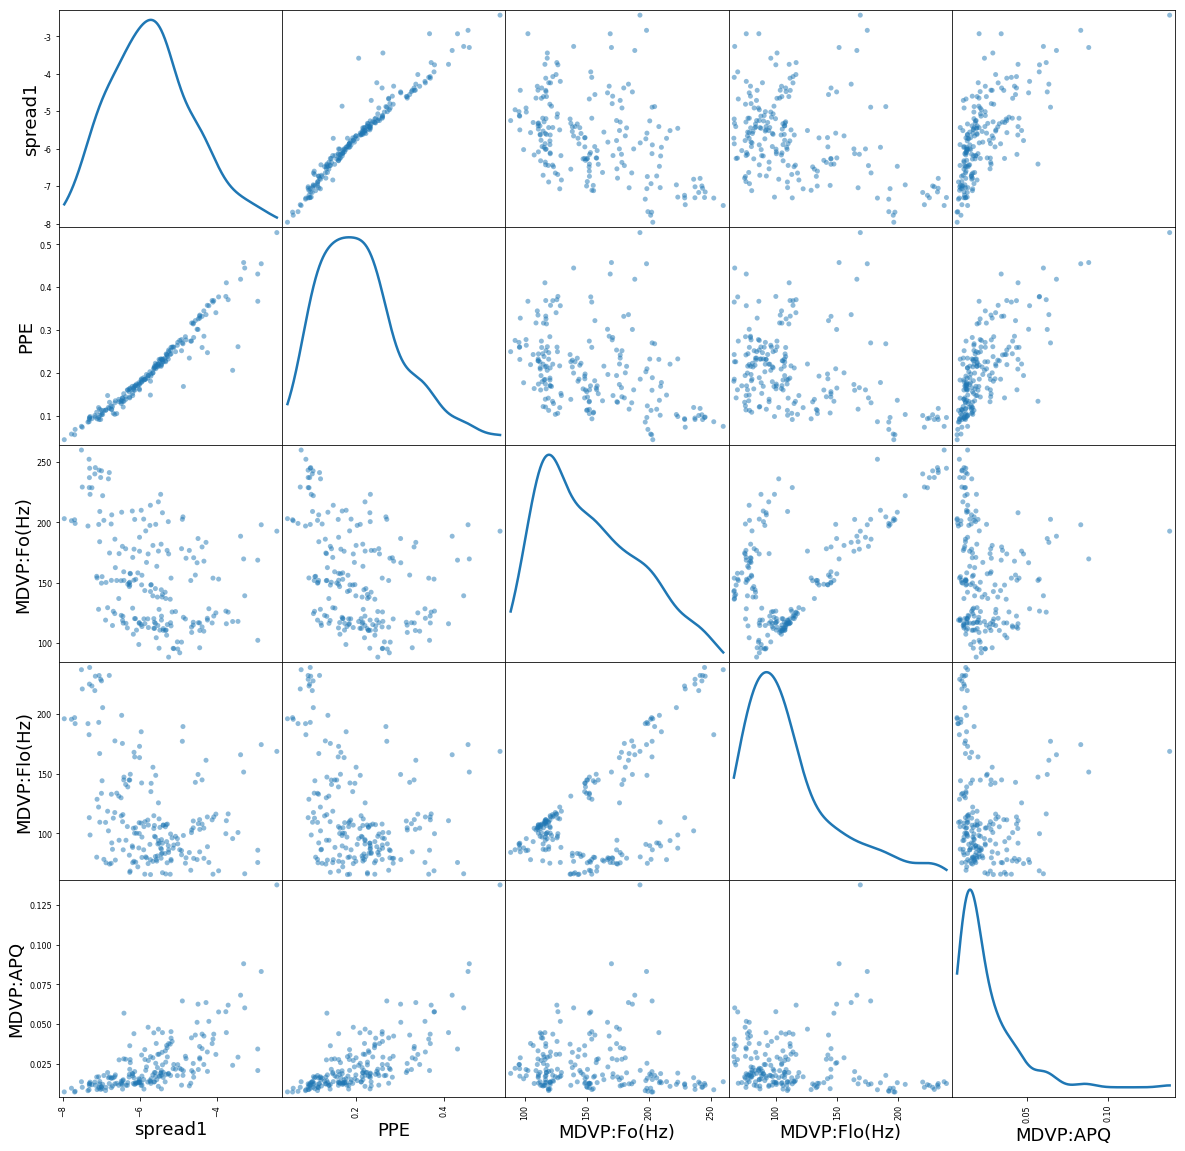

In [14]:
pd.plotting.scatter_matrix(df[varSorted[:5]], figsize=(20, 20), diagonal='kde');

## 3. Modelling of the linear correlation between `spread1` and `PPE` (5pts)

We will try to model the linear correlation between `spread1` and `PPE` by the following mathematical function $f(x)$, parametrized by two unknown numbers $(a, b)$:
$$
y = f(a, b; x) = ax + b
$$

The goal of what follows it to find the best value of $(a, b)$ which model the data, and try to qualitively assess the quality of the model.

### 3.1  Loss function definition (2pts) 

The quantity we want to minimize, called *loss function* can be defined as the distance between observed points and predicted points, summed over all observations. Mathematically, it is defined as:
$$
C(a, b) = \sqrt{\sum_i ( y_i - f(a, b; x_i) )^2}
$$

a) Write a python function which takes in argument the parameter $a$ and $b$ (numbers), as well as $\{x_i\}$ and $\{y_i\}$ data (two 1-dim numpy array) and returns the value of the loss function.

In [15]:
def loss(a, b, x, y):
    return np.sqrt(np.sum( (y- a*x-b)**2 ))

b) Print the value of the loss function for $(a,b) = (0.1, 1.0)$ when $x$ values are `spread1` and $y$ values are `PPE`.

In [16]:
# Get data
xData = df['spread1']
yData = df['PPE']
print(loss(0.1, 1.0, xData, yData))

3.175711753220589


c) Plot the loss function for 1000 values of $a$ between $-1$ and $1$, and do this twice, namely for $b=0$ and $b=4$. What do you conclude on the value of $a$ which minimize the loss function?

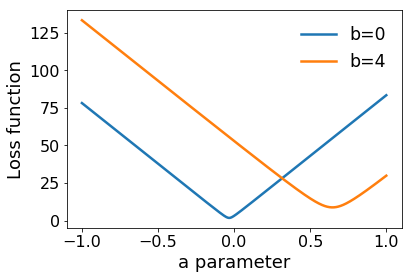

In [17]:
for b in [0, 4]:
    aVals = np.linspace(-1., 1, 1000)
    c = [loss(a, b, xData,yData) for a in aVals]
    plt.plot(aVals, c, label='b={}'.format(b))
plt.legend()
plt.xlabel('a parameter')
plt.ylabel('Loss function');

### 3.2 Finding the best model parameters - not optimized version (3pts)

Now, we want to account for the full model parameter space by producing a 2D plot of $C(a,b)$ in order to find which $(a,b)$ value lead the the best linear model.

a) First plot $C(a,b)$ for 30 values of $a$ between $-1$ and $1$ and 30 values of $b$ between $-4$ and $-4$. 



> **HINT:** a 2D array can be plotted *verus* `x` and `y` using `plot.imshow()` with the following options:
> ```python
> plt.imshow(array2D, interpolation='none', aspect='auto', origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
> ```

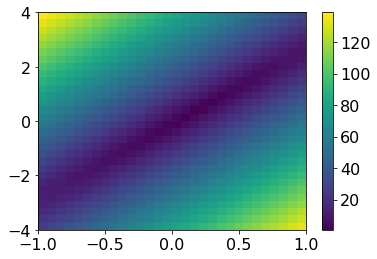

In [18]:
aVals, bVals = np.linspace(-1, 1, 30), np.linspace(-4, 4, 30)
c = np.array([[loss(a, b, xData, yData) for b in bVals] for a in aVals])
plt.imshow(c, interpolation='none',
           extent=[aVals.min(), aVals.max(), bVals.min(), bVals.max()], 
           aspect='auto', origin='lower');
plt.colorbar();

b) Find the $(a,b)$ for which $C(a, b)$ is minimum. 

> **HINT:** the function `np.argmin(a)` will be useful here, but returns the index of the minimum in the *flatten array* (try it on a example of 2-dim array). The numpy function `np.unravel_index(indices)` allows to convert this indices into a n-dim index, which can be used in the originl n-dim array.

In [19]:
iMin = np.unravel_index(c.argmin(), c.shape)
aMin = aVals[iMin[0]]
bMin = bVals[iMin[1]]
print(iMin, aMin, bMin)

(15, 16) 0.034482758620689724 0.4137931034482758


c) Plot the best model overlaid with data.

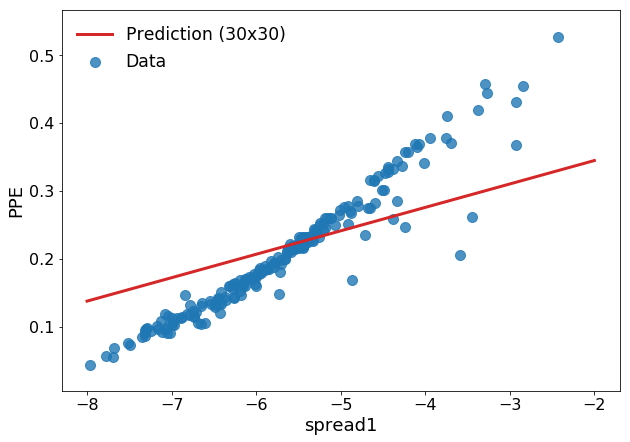

In [20]:
xModel = np.linspace(-8, -2, 1000)
yModel10 = aMin * xModel + bMin

plt.figure(figsize=(10, 7))
plt.scatter(xData, yData, label='Data', alpha=0.8)
plt.plot(xModel, yModel10, color='tab:red', label='Prediction (30x30)', linewidth=3)
plt.legend()
plt.xlabel('spread1')
plt.ylabel('PPE');

### 3.2 BONUS: finding the best model parameters - optimized version (3pts)

This result might not be so nice. One would need more point to scan the parameter space. However, doing loops - without surprise - is quite expensive (try to replace 30x30 by a 1000x1000 grid, for instance). 


a) Modify the python loss function so that `a` and `b` can be 1-dim arrays (potentially of different size), and not single values, using advanced broadcasting.

In [21]:
def lossArrayParam(a, b, x, y):
    '''
    a = array of shape (Na)
    b = array of shape (Nb)
    x, y = array of shape (Ndata)
    
    return an array of shape (Na, Nb)
    '''
    
    # Introduce new dimension to allow broadcasting
    A = a[:, np.newaxis, np.newaxis]
    B = b[np.newaxis, :, np.newaxis]
    X = x[np.newaxis, np.newaxis, :]
    Y = y[np.newaxis, np.newaxis, :]
    
    # Return the cost function
    return np.sqrt(np.sum((Y-A*X-B)**2, axis=2))

In [22]:
# testing
a = np.array([1, 2, 3, 4])
b = np.array([4, 5, 6])
c = lossArrayParam(a, b, xData, yData)
print(c.shape)
print(c)

(4, 3)
[[ 29.87850453  18.71510521  14.06361593]
 [109.73038359  96.33988002  83.13836588]
 [190.39897729 176.84872412 163.36820956]
 [271.15634872 257.5510656  243.98634661]]


b) Repeat the parameter scan using 1 millions points, *i.e.* on a $1000 \times 1000$ grid. Plot the obtained best model, overlaid with data and previously found model (with a $30 \times 30$ grid). What is your conclusion?

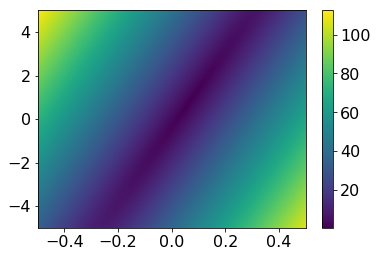

In [23]:
aVals, bVals = np.linspace(-0.5, 0.5, 1000), np.linspace(-5, 5, 1000)
c = lossArrayParam(aVals, bVals, xData, yData)
plt.imshow(c, interpolation='none', aspect='auto', origin='lower',
           extent=[aVals.min(), aVals.max(), bVals.min(), bVals.max()])
plt.colorbar();

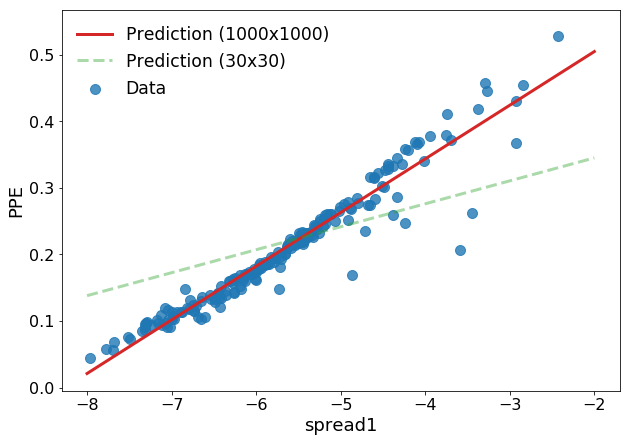

In [24]:
# Best parameters
iMin = np.unravel_index(c.argmin(), c.shape)
aMin = aVals[iMin[0]]
bMin = bVals[iMin[1]]

# Compute predictions
yModel1000 = aMin * xModel + bMin

# Plot and compare to data
plt.figure(figsize=(10, 7))
plt.scatter(xData, yData, label='Data', alpha=0.8)
plt.plot(xModel, yModel1000, color='tab:red', label='Prediction (1000x1000)', linewidth=3)
plt.plot(xModel, yModel10  , color='tab:green', label='Prediction (30x30)', linewidth=3, linestyle='--', alpha=0.4)
plt.legend()
plt.xlabel('spread1')
plt.ylabel('PPE');

### 3.3 BONUS: comparison of several loss functions and grid granularity (2pts)

Re-factorize the code to have a single function taking a loss function and number of grid points as argument, and returning the best parameters. Use this function to compare the results of various loss functions, and the impact of the grid granularity on the final result.

In [25]:
def getParameters(lossFunc, N=1000):
    
    '''
    lossFunc = f(a, b, x, y) where a, b, x, y are 1D array.
    Dimension of x and y should be equal
    
    N = integer specifying the step for parameter grid scan.
    
    return best value of a and b
    '''
    
    # Define broadcasted loss function
    def computeLoss(a, b, x, y):
        A = a[:, np.newaxis, np.newaxis]
        B = b[np.newaxis, :, np.newaxis]
        X = x[np.newaxis, np.newaxis, :]
        Y = y[np.newaxis, np.newaxis, :]
        return lossFunc(A, B, X, Y)
    
    # Compute loss function
    a, b = np.linspace(-0.5, 0.5, N), np.linspace(-5, 5, N)
    c = computeLoss(a, b, xData, yData)
    
    # Get and return optimal parameters
    iMin = np.unravel_index(c.argmin(), c.shape)
    return a[iMin[0]], b[iMin[1]]

In [26]:
def loss1(a, b, x, y):
    return np.abs(np.sum(y - a*x-b, axis=2))
    
def loss2(a, b, x, y):
    return np.sum(np.abs(y - a*x-b), axis=2)
    
def loss3(a, b, x, y):
    return np.sqrt(np.sum((y - a*x-b)**2, axis=2))

In [27]:
def compareLoss(funcs):

    # Plot data
    plt.figure(figsize=(10, 7))
    plt.scatter(xData, yData, label='Data', alpha=0.5, color='black')
    
    # Compare loss functions
    xModel = np.linspace(-8, -2, 1000)
    for i, f in enumerate(funcs):
        a, b = getParameters(f)
        plt.plot(xData, a*xData + b, label='Loss {}: a={:1.2f}, b={:1.2f}'.format(i, a, b))
    plt.legend()

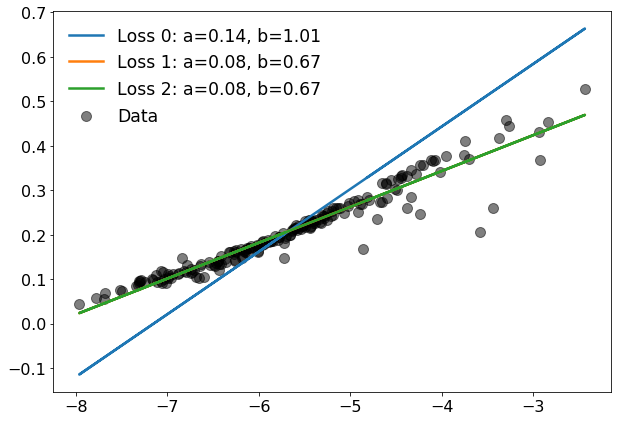

In [28]:
compareLoss([loss1, loss2, loss3])

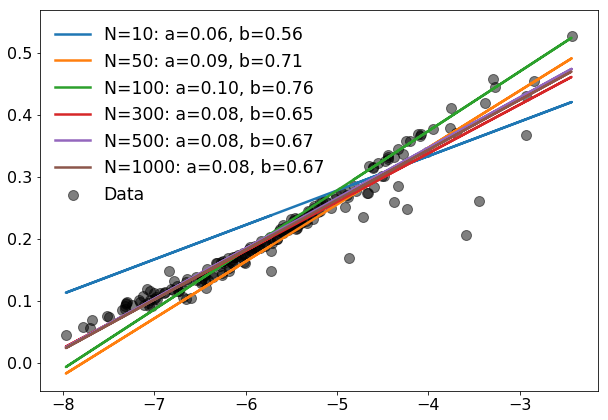

In [29]:
def compareN(Ns):

    # Plot data
    plt.figure(figsize=(10, 7))
    plt.scatter(xData, yData, label='Data', alpha=0.5, color='black')
    
    # Compare loss functions
    xModel = np.linspace(-8, -2, 1000)
    for N in Ns:
        a, b = getParameters(loss2, N)
        plt.plot(xData, a*xData + b, label='N={}: a={:1.2f}, b={:1.2f}'.format(N, a, b))
    plt.legend()
    
compareN([10, 50, 100, 300, 500, 1000])